# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.183157e+01     7.604478e+00
 * time: 0.003328084945678711
     1     2.922106e+01     4.934404e+00
 * time: 0.015072107315063477
     2     2.002827e+01     4.205185e+00
 * time: 0.02965402603149414
     3     1.408960e+01     3.687505e+00
 * time: 0.04392719268798828
     4     1.129298e+01     1.425670e+00
 * time: 0.05857706069946289
     5     1.057234e+01     2.729221e+00
 * time: 0.07062005996704102
     6     9.920489e+00     1.323342e+00
 * time: 0.08265304565429688
     7     9.376102e+00     1.108485e+00
 * time: 0.09471702575683594
     8     8.940856e+00     1.508759e+00
 * time: 0.10677814483642578
     9     8.629640e+00     8.931104e-01
 * time: 0.11915302276611328
    10     8.450036e+00     9.210751e-01
 * time: 0.13157010078430176
    11     8.296960e+00     7.163049e-01
 * time: 0.14377903938293457
    12     8.250817e+00     9.335160e-01
 * time: 0.15293622016906738
    13     8.175013e+00     7.265424e-01
 * tim

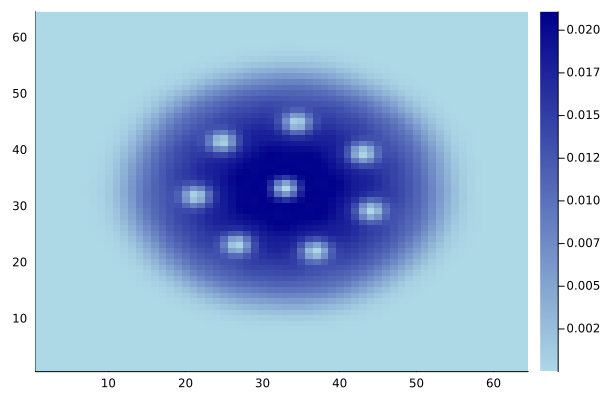

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)